In [2]:
import os
import cv2
import pickle
import matplotlib.pyplot as plt
import numpy as np
import torchvision

from IPython.display import clear_output
from PIL import Image

In [84]:
with open("USA2RU_orig.pkl", "rb") as f:
    orig = pickle.load(f)

In [85]:
with open("USA2RU_forward.pkl", "rb") as f:
    fake = pickle.load(f)

In [74]:
orig = orig[1000:2500]

In [103]:
len(fake)

500

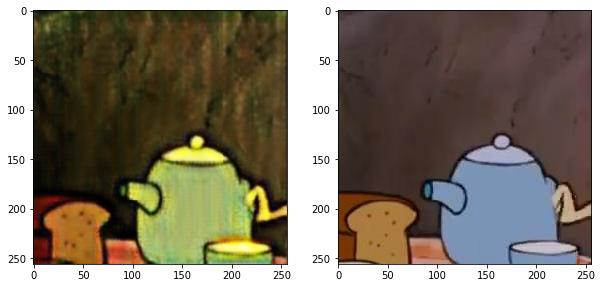

In [113]:
fig = plt.figure(figsize= (10,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(fake[200][0]);
ax2.imshow(orig[200][0]);

In [48]:
img = np.hstack((fake[0][0], fake[0][1]))[:, :, ::-1]

In [91]:
def make_video(pairs_list1, pairs_list2, name): #takes two lists of tuples with left and right pics and makes video
    
    out = cv2.VideoWriter(name, cv2.VideoWriter_fourcc(*'MJPG') , 15.0, (512, 512))  

    for i in range(len(pairs_list1)):
        
        img1 = np.hstack((pairs_list1[i][0], pairs_list1[i][1]))[:, :, ::-1]
        img2 = ((np.hstack((pairs_list2[i][0], pairs_list2[i][1]))[:, :, ::-1])*256).astype(np.uint8)

        img = np.vstack((img1, img2))

        out.write(img)

    out.release()
    cv2.destroyAllWindows() 

In [87]:
make_video(orig, fake, 'usa_winni.avi')

In [89]:
def save_from_pickle(name, path=''): #saves pictures in proper way from pickle whith tuples list
    
    with open(name, "rb") as f:
        pairs_list = pickle.load(f)

    for i, pair in enumerate(pairs_list):
    
        im_left = Image.fromarray(pair[0])
        im_left.save(path + '{}_left.png'.format(i))
        
        im_right = Image.fromarray(pair[1])
        im_right.save(path + '{}_right.png'.format(i))
        if i % 100 ==0:
            clear_output(True)
            print(i)

In [69]:
!mkdir testA

In [90]:
save_from_pickle("SpiderMan0.pkl", path='testA/')

In [94]:
def SaveArray(name, array): #saves list as pickle
    with open('./'+name+'.pkl', 'wb') as out:
        pickle.dump(array, out, 2)

In [93]:
def make_pickle(num1, num2, path='./images/', name='_fake_B.png'): #makes pickle from pair images

    res = [] 
    for i in range(num1, num2):

        img_left = plt.imread(path + str(i) + '_left' + name)
        img_right = plt.imread(path + str(i) + '_right' + name)

        res += [(np.array(img_left), np.array(img_right))]
        clear_output(True)
        print(i)

        SaveArray('spider_fake', res)

In [80]:
make_pickle(1000, 2500) #from 1000 to 2500 frames